In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
df=pd.read_excel('/content/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**#checking null values**

In [26]:
#checking null values
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [27]:
df1=df.copy()
df1 = df1.interpolate()
df1

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,Iris-setosa
1,4.90,3.0,1.4,0.2,Iris-setosa
2,4.75,3.2,1.3,0.2,Iris-setosa
3,4.60,3.1,1.5,0.2,Iris-setosa
4,5.00,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.70,3.0,5.2,2.3,Iris-virginica
146,6.30,2.5,5.0,1.9,Iris-virginica
147,6.50,3.0,5.2,2.0,Iris-virginica
148,6.20,3.4,5.4,2.3,Iris-virginica


In [28]:
df1.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [29]:
df1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [30]:
df1.value_counts('Classification')

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

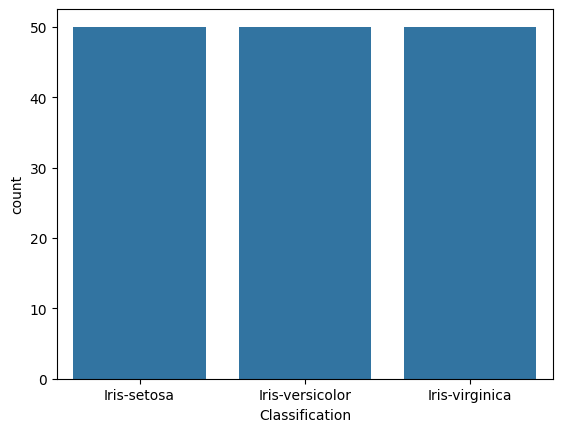

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Classification', data=df1, )
plt.show()

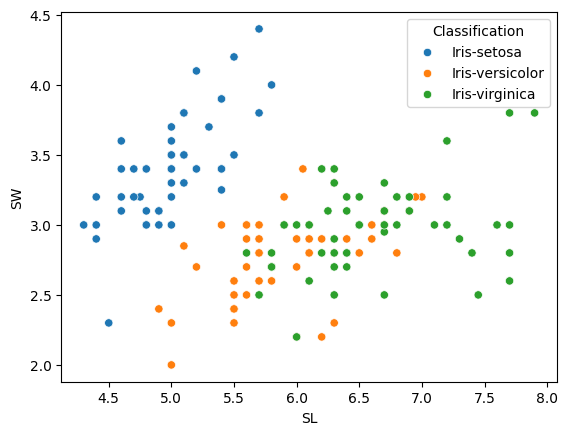

In [32]:
sns.scatterplot(x='SL', y='SW',
                hue='Classification', data=df1, )

# Placing Legend outside the Figure
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

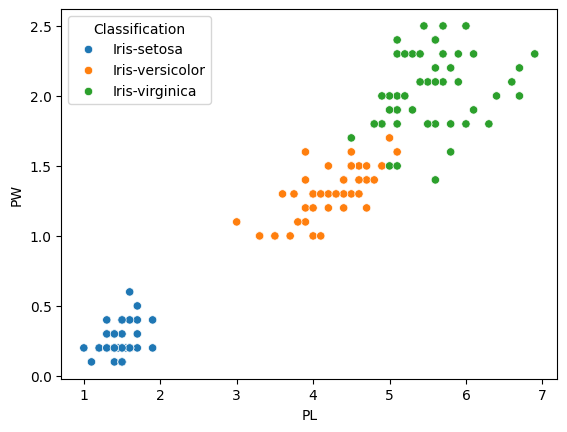

In [33]:
sns.scatterplot(x='PL', y='PW',
                hue='Classification', data=df1, )
plt.show()

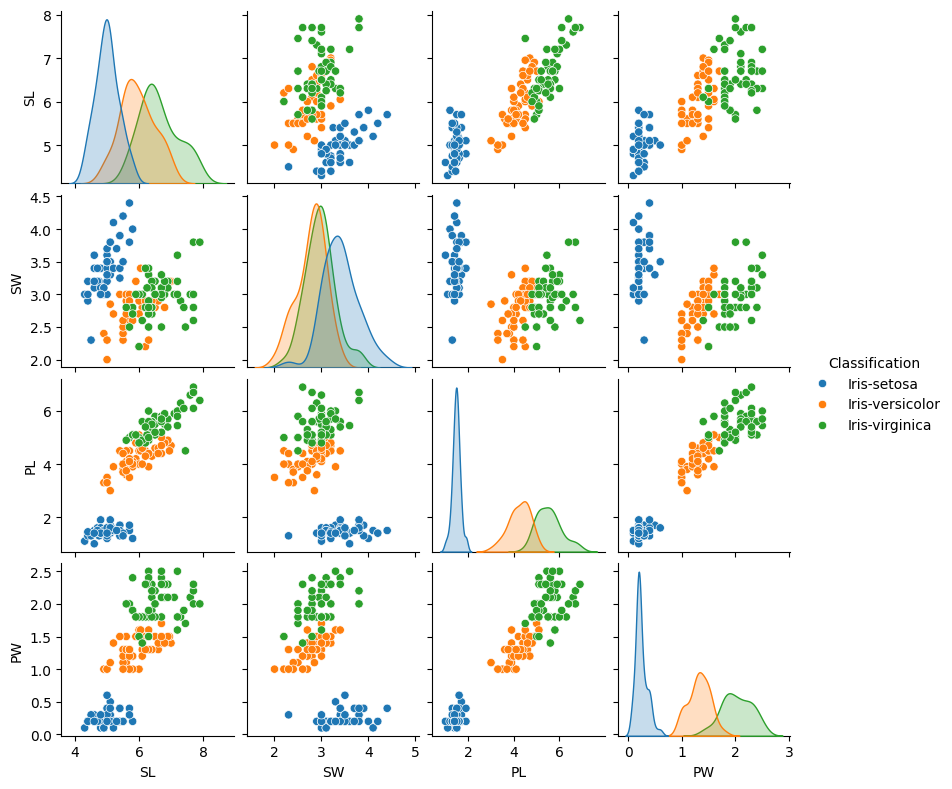

In [34]:
sns.pairplot(df1, hue='Classification', height=2)

In [21]:
df1['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# **Checking out layers**

<Axes: ylabel='SW'>

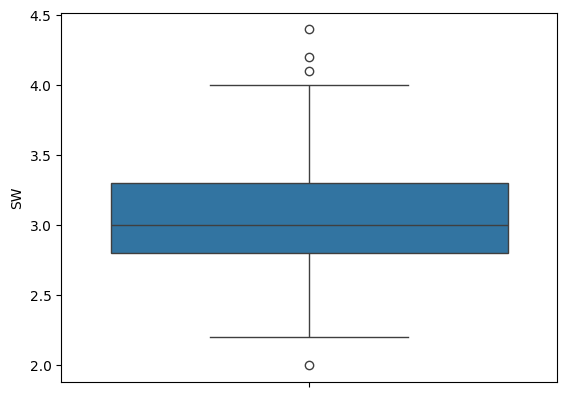

In [44]:
#sns.boxplot(x="Classification", y='PL', data=df1)
sns.boxplot(data=df1['SW'])

<Axes: ylabel='SL'>

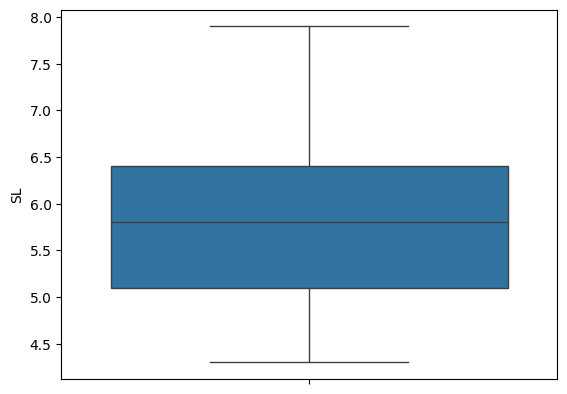

In [45]:
sns.boxplot(data=df1['SL'])

<Axes: ylabel='PW'>

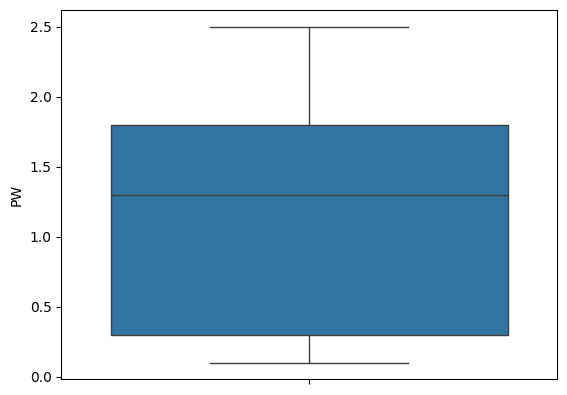

In [46]:
sns.boxplot(data=df1['PW'])

<Axes: ylabel='PL'>

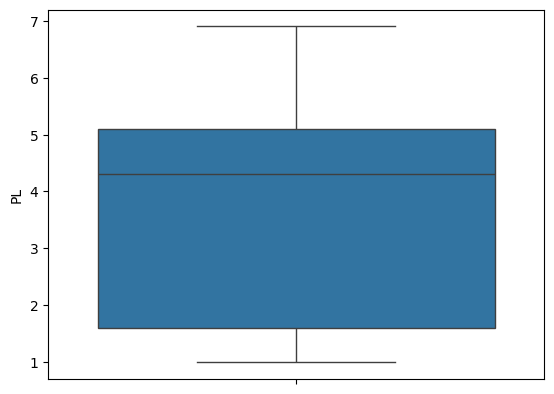

In [47]:
sns.boxplot(data=df1['PL'])

In [48]:
#Have to remove outlayers from SW
q1=df1['SW'].quantile(0.25)
q3=df1['SW'].quantile(0.75)
iqr=q3-q1
iqr


0.5

In [49]:
upper_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print(low_lim)
print(upper_lim)

2.05
4.05


In [50]:
out=[]
for x in df1['SW']:
  if x>upper_lim or x < low_lim:
    out.append(x)
out

[4.4, 4.1, 4.2, 2.0]

In [51]:
df1['SW'] = df1['SW'].clip(lower=low_lim,upper=upper_lim)

In [52]:
out=[]
for x in df1['SW']:
  if x>upper_lim or x < low_lim:
    out.append(x)
out

[]

<Axes: ylabel='SW'>

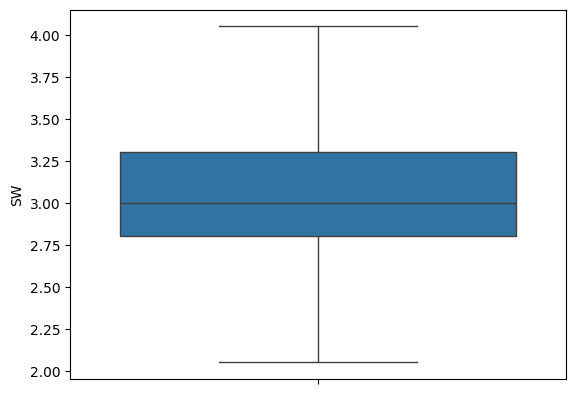

In [55]:
sns.boxplot(data=df1['SW'])

# **Encoding**

In [58]:
df2=df1.copy()


In [59]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['Classification']=label_encoder.fit_transform(df2['Classification'])
df2['Classification'].unique()

array([0, 1, 2])

In [60]:
df2.head(5)

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,0
1,4.90,3.0,1.4,0.2,0
2,4.75,3.2,1.3,0.2,0
3,4.60,3.1,1.5,0.2,0
4,5.00,3.6,1.4,0.2,0


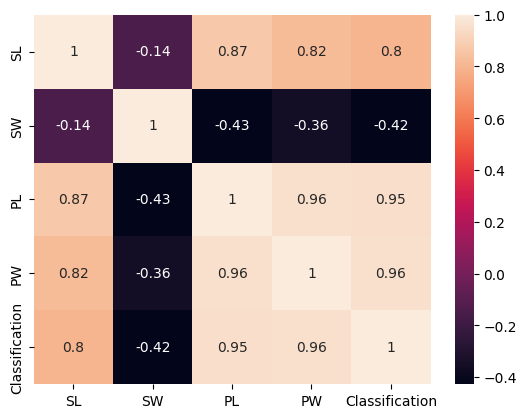

In [61]:
sns.heatmap(df2.corr(method='pearson'),
            annot = True);

plt.show()

**Setting train and test data**

In [63]:
y=df2['Classification']
X=df2.drop(['Classification'],axis=1)
X.shape


(150, 4)

In [64]:
y.shape

(150,)

In [65]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(150, 1)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [67]:
y_test

array([[1],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0]])

In [68]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

# **LogisticRegression**

In [69]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict=log_model.predict(X_test)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [73]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("Accuary score",accuracy_score(y_test,y_predict))
#print("precision_score",precision_score(y_test,y_predict))
#print("recall_score",recall_score(y_test,y_predict))
#print("f1_score",f1_score(y_test,y_predict))

Accuary score 0.9666666666666667


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

## **LogisticRegression Accuary score 0.9666666666666667**

# KNN algorithm

In [75]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(1,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

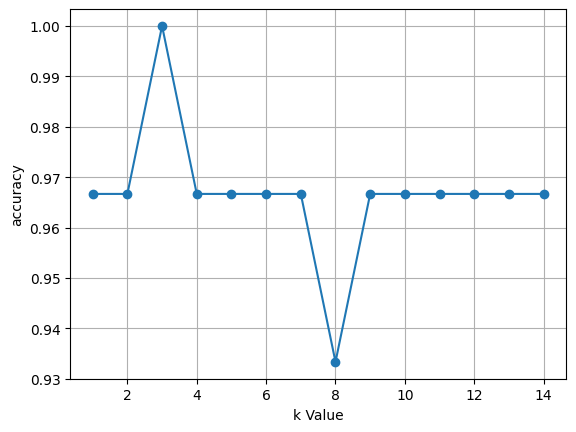

In [76]:
import matplotlib.pyplot as plt
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [78]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))



accuarcy score 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [79]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
#p=2-euclidean distance
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [80]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=1)
#p=1 for manhattan disctance
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [81]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='linear')
svm_cl.fit(X_train,y_train)
y_svm_prediction=svm_cl.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction))

confusion_matrix [[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [84]:
print("accuracy_score",accuracy_score(y_test,y_svm_prediction))

accuracy_score 0.9333333333333333


In [85]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='rbf')
svm_cl.fit(X_train,y_train)
y_svm_prediction_rbf=svm_cl.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction_rbf))

confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [87]:
print("accuracy_score",accuracy_score(y_test,y_svm_prediction_rbf))

accuracy_score 0.9666666666666667


In [89]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='poly')
svm_cl.fit(X_train,y_train)
y_svm_prediction_poly=svm_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction_poly))

confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print("accuracy_score",accuracy_score(y_test,y_svm_prediction_poly))

accuracy_score 0.9333333333333333


In [91]:
from sklearn.tree import DecisionTreeClassifier
dsn_cl=DecisionTreeClassifier(criterion='entropy')
dsn_cl.fit(X_train,y_train)
y_dsn_prediction_poly=dsn_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_dsn_prediction_poly))

confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [92]:
print("accuracy_score",accuracy_score(y_test,y_dsn_prediction_poly))

accuracy_score 0.9666666666666667


In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc_cl=RandomForestClassifier(criterion='entropy')
rfc_cl.fit(X_train,y_train)
y_rfc_prediction=rfc_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_rfc_prediction))
print("accuracy_score",accuracy_score(y_test,y_rfc_prediction))

<ipython-input-93-4b87afe72514>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_cl.fit(X_train,y_train)


confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
accuracy_score 0.9666666666666667


# **Conclusion-KNN given the most accurate result**